# Интерполирование функций

In [1]:
import random
# модули для математических операций
import math
import numpy as np
# модули для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
# модули для работы с данными
import pandas as pd
pd.options.display.float_format ='{:,.5f}'.format

# Постановка задачи

1. На отрезке $[a,b]$ задана таблица значений функции $f(x)$ с шагом $h$. Погрешность каждого заданного значения не превышает $\varepsilon$. Используя интерполирование Ньютона для начала и конца таблицы, с помощью многочленов минимальной степени построить таблицу значений функции $f(x)$ с шагом $0.5h$. Погрешность каждого нового значения также не должна превышать заданной величины $\varepsilon$. В отчет включить обе таблицы значений, а также подробное описание выбора степени интерполирующих многочленов.

$$f(x) = xe^{-x},\quad [a,b] = [0,2],\quad h = \dfrac{1}{10},\quad \varepsilon = 10^{-4}$$

2. На отрезке $[a,b]$ заданы функции $f_1(x)$ и $f_2(x)$. Построить многочлены степени $n=3,5,7,10,15,20$, интерполирующие каждую из них по узлам

а) равномерно расположенным на указанном отрезке;

б) расположенным на указанном отрезке оптимальным (минимизирующим погрешность) образом;

В отчет включить графики полученных интерполяционных многочленов, представление использованное при их построении, а также способ выбора узлов.

$$f_1(x) = x\cos(x+5),\quad f_2(x) = \dfrac{1}{1+25x^2},\quad [a,b] = [-5, 5].$$

# Задача 1

Определим компьютерный метод, который будет вычислять значение функции $f(x) = x \cos x$ в заданной точке.

In [2]:
def f(x):
    return x * np.cos(x)

Определим переменные для всех входных данных:
- $\varepsilon = 10^{-5}$;
- $h = \dfrac{p}{20}$;
- $n = \dfrac1h$ -- число узлов.

Пусть $p=1$.

In [3]:
epsilon = 1e-5
p = 1
h = p / 20
a, b = 0, p
num_of_nodes = int(1 / h) + 1

Создадим таблицу "узел-значение", в которой и будут содержаться узлы и соответствующие им значения функции.

In [4]:
interpolation_nodes = np.around(np.array([a + i*h for i in range(num_of_nodes)]), 5)


interpolation_nodes_table = pd.DataFrame.from_dict({'x' : interpolation_nodes, 
                                                    'f(x)' : np.around(f(interpolation_nodes), 5)}, orient='index')

In [5]:
interpolation_nodes_table

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
x,0.00000,0.05000,0.10000,0.15000,0.20000,0.25000,0.30000,0.35000,0.40000,0.45000,...,0.55000,0.60000,0.65000,0.70000,0.75000,0.80000,0.85000,0.90000,0.95000,1.00000
f(x),0.00000,0.04994,0.09950,0.14832,0.19601,0.24223,0.28660,0.32878,0.36842,0.40520,...,0.46889,0.49520,0.51745,0.53539,0.54877,0.55737,0.56099,0.55945,0.55260,0.54030


При интерполировании в начале таблицы остаток интерполирования мы можем оценить следующим образом:
$$|r_k(x)| = \left|h^{k+1}\dfrac{t(t-1)\ldots (t-k)}{(k+1)!}f^{(k+1)}(\xi)\right|\leq \left|h^{k+1}\dfrac{t(t-1)\ldots (t-k)}{(k+1)!}\right|\cdot \max_{x\in[a,b]}|f^{(k+1)}(x)|,\quad \xi \in [x_0, x_{0}+kh],$$
где $$t = \dfrac{x-x_0}{h},$$ которое в нашем случае известно, поскольку точки интерполирования мы берем как середины каждого отрезка $[x_{i}, x_{i+1}]$, $i=\overline{0, n-1}$, а именно $$t = \dfrac{1}{2}$$
Из неравенства выше ограничение для погрешности остатка интерполирования задается следующей формулой
$$\left|h^{k+1}\dfrac{t(t-1)\ldots (t-k)}{(k+1)!}\right|\cdot \max_{x\in[a,b]}|f^{(k+1)}(x)| < \varepsilon.$$
Подставляя известные нам значения, имеем $$\left|\left(\dfrac{1}{20}\right)^{k+1}\cdot\dfrac{\frac12(\frac12-1)\ldots (\frac12-k)}{(k+1)!}\right|\cdot \max_{x\in[0,1]}|(x\cos x)^{(k+1)}| < 10^{-5}.$$

Из этой формулы мы и можем оценивать значение $k$ --- степени интерполирующего многочлена, которую нам и надо взять. Причем получить значение $k$ можно лишь подбором в данном случае. 

Возьмем $k = 2$. Тогда необходимо вычислить $3$-ую производную от интерполируемой функции:
$$f'(x) = \cos x - x\sin x,$$
$$f^{(2)}(x) = -2\sin x - x\cos x,$$
$$f^{(3)}(x) = -3\cos x + x\sin x.$$
Оценим наибольшее значение 3-ой производной на всем отрезке $[0,1]$. Функция $-3\cos x$ на отрезке $[0,1]$ является возрастающей, ее множество значений $[-3, -3\cos1] \subset[-3, 0]$. Функция $x\sin x$ на отрезке $[0,1]$ является возрастающей как произведение возрастающих функций, ее множество значений $[0, \sin 1]\subset[0, 1]$. Отсюда видно, что для суммы этих функций наибольшее по модулю значение будет на левом конце отрезка. Тогда $$\max_{x\in[0,1]}|f^{(3)}(x)| = 3.$$
Вычислим значение второго множителя: $$\left|\left(\dfrac{1}{20}\right)^{3}\cdot\dfrac{\frac12(\frac12-1)(\frac12-2)}{3!}\right| = \dfrac{1}{2^3}\cdot 10^{-3} \cdot  \dfrac{\frac12(1-\frac12)(2-\frac12)}{3!}=\dfrac{1}{2^3}\cdot 10^{-3}\cdot \dfrac{1}{2^4} = \dfrac{1}{2^7}\cdot 10^{-3}=0.0078125\cdot10^{-3}.$$

Таким образом, $$|r_2(x)|=7.8125 \cdot 10^{-6}\cdot 3 = 2.34375\cdot 10^{-5} > 10^{-5},$$ то есть такое значение $k$ нам не подходит, потому что оценка остатка интерполирования чуть выше заданной погрешности. Однако уже на этом шаге понятно, что следующее значение при $k=3$ должно оказаться ниже заданной погрешности.

Возьмем $k=3$. Вычислим $4$-ую производную исходной функции $$f^{(4)} = 4\sin x + x\cos x.$$
Оценим ее наибольшее значение на отрезке $[0,1]$. Функция на отрезке неотрицательная (это следует из свойств $x, \sin x, \cos x$), воспользуемся оценкой сверху для нее: $$|f^{(4)}| = |4\sin x + x\cos x| \leq 4 + 1 = 5.$$
Вычислим значение второго множителя: $$\left|\left(\dfrac{1}{20}\right)^{4}\cdot\dfrac{\frac12(\frac12-1)(\frac12-2)(\frac12-3)}{4!}\right| = \dfrac{1}{2^4}\cdot 10^{-4} \cdot  \dfrac{\frac12(1-\frac12)(2-\frac12)(3-\frac12)}{24}=\dfrac{1}{2^4}\cdot 10^{-4}\cdot \dfrac{5}{2^7} = \dfrac{5}{2^{11}}\cdot 10^{-4}=2.44140625\cdot10^{-7}.$$

Таким образом, $$|r_3(x)|\leq 2.44140625\cdot10^{-7}\cdot 5 \approx 1.22070\cdot 10^{-6} < 10^{-5},$$ что означает достижение необходимой погрешности.

Теперь же составим компьютерный аллгоритм вычисления оценки остатка по заданной формуле и сравним получившиеся результаты. Для этого определим методы, соответствующие 3-ей и 4-ой производной, а также метод, который будет с помощью цикла вычислять значение оценки остатка интерполирования.

In [6]:
def third_derivative(x):
    return -3 * np.cos(x) + x * np.sin(x)

def fourth_derivative(x):
    return 4 * np.sin(x) + x * np.cos(x)

In [7]:
def remainder_estimation(h, k, t, derivative, a, b, start=True):
    x = np.linspace(a, b, num=100000)
    result = np.max(abs(derivative(x)))
    if start:
        for i in range(k+1):
            result *= abs(h * ((t-i) / (i+1)))
    else:
        for i in range(k+1):
            result *= abs(h * ((t+i) / (i+1)))
    return result

Сперва посмотрим, верный ли результат мы получили в случае $k=2$:

In [8]:
t = 1/2
k = 2
remainder_estimation(h, k, t, third_derivative, a, b)

2.3437500000000007e-05

In [9]:
remainder_estimation(h, k, t, third_derivative, a, b) < epsilon

False

То есть компьютерно вычисленный результат действительно совпал с результатом, который мы получили аналитически. 

Рассмотрим, что будем при $k=3$.

In [10]:
k = 3
remainder_estimation(h, k, t, fourth_derivative, a, b)

9.536587512450504e-07

In [11]:
remainder_estimation(h, k, t, fourth_derivative, a, b) < epsilon

True

Как можно заметить, значение оценки остатка полученное компьютерными методами оказалось достаточно близким к вычисленному нами значению (так как максимальное значение производной мы не вычисляли, а воспользовались оценкой сверху). И также при $k=3$ мы достигли нужного значения погрешности.

Вторым этапом исследования является введение аппарата конечных разностей. 

$\bullet$ **Конечная разность нулевого порядка** совпадает со значением функции $f(x_i) = y_i$.

**Конечная разность первого порядка** определяется равенствами  $$\Delta y_i = y_{i+1} - y_i.$$ **Конечная разность второго порядка** определяется равенствами $$\Delta^2 y_i = \Delta y_{i+1} - \Delta y_{i}.$$
**Конечная разность $k$-ого порядка** определяется равенствами $$\Delta ^k y_i = \Delta (\Delta^{k-1} y_i) = \Delta ^{k-1}y_{i+1} - \Delta ^{k-1}y_i.$$

Для вычисления конечной разности можно использовать один из следующих алгоритмов:
1. с помощью формулы $$\Delta ^k y_i = \sum_{j=0}^{k}(-1)^j C^j_k y_{i+k-j};$$
2. с помощью таблицы вида $$\begin{matrix} x_0 & f(x_0) & \Delta y_0 & \Delta^2 y_0 & \ldots & \Delta^{n-1} y_0 & \Delta^n y_0 \\ x_1 & f(x_1) & \Delta y_1 & \Delta^2 y_1 & \ldots & \Delta^{n-1}y_1 & - \\ \vdots & \vdots & \vdots & \vdots & \ddots & - & -\\ x_{n-1} & f(x_{n-1}) & \Delta y_{n-1} & - & \ldots & - & - \\ x_n & f(x_n) & - & - & \ldots & - & -\end{matrix}$$
Для обоих алгоритмов определим компьютерные методы:
для начала определим метод для вычисления числа сочетаний (через построение треугольника Паскаля)

In [12]:
def comb(n, k, as_table=False):
    C = np.zeros((n+1, n+1))
    for i in range(n+1):
        C[i,0]=1
        C[i,i]=1
        for j in range(1,i):
            C[i, j]=C[i-1, j-1]+C[i-1, j]
    if as_table:
        return C
    return C[n,k]

Например, $C_5^5$

In [13]:
comb(5, 5, as_table=True)

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  2.,  1.,  0.,  0.,  0.],
       [ 1.,  3.,  3.,  1.,  0.,  0.],
       [ 1.,  4.,  6.,  4.,  1.,  0.],
       [ 1.,  5., 10., 10.,  5.,  1.]])

Определим метод для вычисления конечных разностей через формулу суммы

In [14]:
def fin_diff_sum(nodes, function, k, i):
    result = 0
    for j in range(k+1):
        result += (-1)**j * comb(k, j) * f(nodes[i+k-j])
    return result

Определим метод для вычисления конечных разностей через таблицу

In [15]:
def fin_diff_table(nodes, function, n, start, as_table=False):
    if isinstance(nodes, list):
        nodes = np.array(nodes)
    k=n+1
    table = np.zeros((k, k+1))
    for i in range(k):
        table[i, 0] = nodes[i+start]
        table[i, 1] = function(nodes[i+start])
    for i in range(2, k+1):
        for j in range(k-i+1):
            table[j,i] = (table[j+1,i-1] - table[j, i-1])
    if as_table:
        return table
    else:
        return table[0, k]

Теперь сравним значения полученные табличным способом со значением, полученным как результат суммы при заданном $k=3$.

In [16]:
fin_diff_sum(interpolation_nodes, f, k, 0)

-0.0003730488337564397

In [17]:
pd.DataFrame(fin_diff_table(interpolation_nodes, f, k, 0, True))

,0,1,2,3,4
0,0.00000,0.00000,0.04994,-0.00037,-0.00037
1,0.05000,0.04994,0.04956,-0.00075,0.00000
2,0.10000,0.09950,0.04882,0.00000,0.00000
3,0.15000,0.14832,0.00000,0.00000,0.00000


Как можно увидеть, крайнее левое значение в таблице совпадает с результатом суммирования. Таким образом, можно использовать любой из этих алгоритмов для вычисления конечных разностей заданного порядка.

Конечные разности мы будем использовать при построении интерполяционного многочлена. 

Сперва покажем оптимальность выбора $k=3$ через оценку значения конечной разности $k$-ого порядка. Для этого возьмем, например, следующее значение $k=4$ и рассмотрим значение разделенной разности:

In [18]:
fin_diff_sum(interpolation_nodes, f, k+1, 0)

3.1158944451825654e-06

Отсюда видно, что значение разделенной разности уже при $k=4$ является меньше значения погрешности $$|\Delta^4 y_0|<\varepsilon.$$
Отсюда следует, что в условиях погрешности разделенные разности при $k>3$ не несут в себе полезной для исследования информации.

Третьим этапом будет исследование аналогичных величин, но уже в конце таблицы. Возьмем уже заданное ранее $k=3$ и рассмотрим оценку остатка интерполирования в конце таблицы. Однако в этот раз сразу воспользуемся компьютерными методами для рассчета оценки остатка интерполирования, которые мы определили ранее. В отличие от интерполирования в начале таблицы теперь формула оценки остатка будет иметь вид $$|r_k(x)| \leq \left|h^{k+1}\dfrac{t(t+1)\ldots (t+k)}{(k+1)!}\right|\cdot \max_{x\in[a,b]}|f^{(k+1)}(x)|.$$

In [19]:
remainder_estimation(h, k, t, fourth_derivative, a, b, start=False) < epsilon

True

То есть данное значение $k=3$ также подходит и при интерполировании в конце таблицы.

Четвертым этапом исследования будет само построение интерполяционного многочлена Ньютона заданной степени по правилу интерполирования в начале и в конце таблицы в соответствии с формулами
$$P_k(x) = P_k(x+th) = y_0 + \dfrac{t}{1!}\Delta y_0 + \dfrac{t(t-1)}{2!} \Delta^2y_0 + \ldots + \dfrac{t(t-1)\ldots (t-k+1)}{k!}\Delta^k y_0,$$
$$P_k(x) = P_k(x_n - th) = y_n + \dfrac{t}{1!}\Delta y_{n-1} + \dfrac{t(t+1)}{2!}\Delta^2 y_{n-2} + \ldots + \dfrac{t(t+1)\ldots (t+k-1)}{k!}\Delta^k y_{n-k}.$$

Причем в нашем случае при подстановке всех известных нам значений формулы примут вид $$P_3 = y_0 + \dfrac{1}{2}\Delta y_0 - \dfrac{1}{8} \Delta^2 y_0 + \dfrac{1}{16}\Delta^3 y_0,$$
$$P_3 = y_n + \dfrac{1}{2}\Delta y_{n-1} + \dfrac{3}{8} \Delta^2 y_{n-2} + \dfrac{5}{16}\Delta^3 y_{n-3}.$$

Однако стоит учесть, что из первого выражения мы можем получить лишь значение в узле $x \in [x_0, x_1]$, а из второго -- значение в узле $x\in [x_{n-1}, x_n]$. Для того, чтобы получать значения из других узлов, необходимо "сдвигать" таблицы вычисляемых конечных разностей вперед (назад).

То есть, иначе говоря, используя интерполирование в начале таблицы и имея таблицу конечных разностей вида

In [20]:
pd.DataFrame(fin_diff_table(interpolation_nodes, f, k, 0, True))

,0,1,2,3,4
0,0.00000,0.00000,0.04994,-0.00037,-0.00037
1,0.05000,0.04994,0.04956,-0.00075,0.00000
2,0.10000,0.09950,0.04882,0.00000,0.00000
3,0.15000,0.14832,0.00000,0.00000,0.00000


мы можем вычислить значение в узле $x=0.025$. С помощью компьютерных методов вычислим это значение и занесем его в новую таблицу "узел-значение". Далее перестроим таблицу конечных разностей и получим таблицу вида 

In [21]:
pd.DataFrame(fin_diff_table(interpolation_nodes, f, k, 1, True))

,0,1,2,3,4
0,0.05000,0.04994,0.04956,-0.00075,-0.00037
1,0.10000,0.09950,0.04882,-0.00112,0.00000
2,0.15000,0.14832,0.04770,0.00000,0.00000
3,0.20000,0.19601,0.00000,0.00000,0.00000


С помощью этой таблицы мы сможем вычислить значение в узле $x=0.075$. Аналогично вычислим с помощью компьютерных методов это значение и занесем в таблицу "узел-значение". 

Но, используя этот процесс, мы не сможем вычислить значения *во всех* новых узлах. Последняя таблица, которую мы построим

In [22]:
pd.DataFrame(fin_diff_table(interpolation_nodes, f, k, 17, True))

,0,1,2,3,4
0,0.85000,0.56099,-0.00154,-0.00531,-0.00013
1,0.90000,0.55945,-0.00685,-0.00545,0.00000
2,0.95000,0.55260,-0.01230,0.00000,0.00000
3,1.00000,0.54030,0.00000,0.00000,0.00000


позволит нам вычислить значение в узле $x=0.875$. То есть в итоге мы вычислим значения в $n-k$ узлах. Для вычисления остальных значений придется использовать интерполирование в конце таблицы аналогичным образом. 

Реализуем компьютерный алгоритм, который будет строить две таблицы "узел-значение": для интерполирования в начале таблицы и в конце таблицы.

In [23]:
def newton_inteprolation_eqsp_nodes(t, k, h, nodes, function):
    n = nodes.shape[0]-1
    new_nodes = np.around(np.array([nodes[i] + t*h for i in range(n)]), 5)
    P_from_start = np.zeros(n)
    P_from_end = np.zeros(n)
    
    for step in range(n-k):
        P_k = 0
        for i in range(k+1):
            mult = 1
            for j in range(i):
                mult *= (t - j) / (j + 1)
            P_k += mult*fin_diff_sum(interpolation_nodes, f, i, step)
        P_from_start[step] = P_k
        
    for step in range(n-1, k-1, -1):   
        P_k = 0
        for i in range(k+1):
            mult = 1
            for j in range(i):
                mult *= (t + j) / (j + 1)
            P_k += mult*fin_diff_sum(interpolation_nodes, f, i, step-i)
        P_from_end[step] = P_k 
        
    return pd.DataFrame.from_dict({'x' : new_nodes, 'P_from_start' : P_from_start, 'P_from_end' : P_from_end,}, orient='index')

In [24]:
newton_inteprolation_eqsp_nodes(t=1/2, k=k, h=h, nodes=interpolation_nodes, function=f)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
x,0.02500,0.07500,0.12500,0.17500,0.22500,0.27500,0.32500,0.37500,0.42500,0.47500,0.52500,0.57500,0.62500,0.67500,0.72500,0.77500,0.82500,0.87500,0.92500,0.97500
P_from_start,0.02499,0.07479,0.12402,0.17233,0.21933,0.26467,0.30799,0.34894,0.38719,0.42241,0.45430,0.48254,0.50685,0.52698,0.54266,0.55368,0.55981,0.00000,0.00000,0.00000
P_from_end,0.00000,0.00000,0.00000,0.17233,0.21933,0.26467,0.30798,0.34894,0.38719,0.42241,0.45429,0.48253,0.50685,0.52697,0.54266,0.55367,0.55980,0.56087,0.55669,0.54713


Как можно заметить, значения вычисленные для начала и для конца таблицы приблизительно совпадают. Для того, чтобы совместить полученную таблицу с исходной, сперва нужно "склеить" две нижние строки получившейся таблицы. Объединим две последние строки в одну, выбирая максимальное из двух значение функции. Тогда получим таблицу

In [25]:
newton_interpolation_table = newton_inteprolation_eqsp_nodes(t=1/2, k=k, h=h, nodes=interpolation_nodes, function=f)
interpolation_values = np.around(np.array([max(newton_interpolation_table.iloc[1, i], newton_interpolation_table.iloc[2, i]) for i in range(num_of_nodes-1)]), 5)
interpolation_table = pd.DataFrame.from_dict({'x' : newton_interpolation_table.iloc[0, :].tolist(), 'f(x)' : interpolation_values}, orient='index')

In [26]:
interpolation_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
x,0.02500,0.07500,0.12500,0.17500,0.22500,0.27500,0.32500,0.37500,0.42500,0.47500,0.52500,0.57500,0.62500,0.67500,0.72500,0.77500,0.82500,0.87500,0.92500,0.97500
f(x),0.02499,0.07479,0.12402,0.17233,0.21933,0.26467,0.30799,0.34894,0.38719,0.42241,0.45430,0.48254,0.50685,0.52698,0.54266,0.55368,0.55981,0.56087,0.55669,0.54713


Последним шагом будет объединение исходной таблицы с получившейся таблицей. Для того, чтобы таблица поместилась, протранспонируем ее.

In [27]:
nodes_value_table = pd.concat([interpolation_nodes_table.T, interpolation_table.T], ignore_index=True).sort_values('x', ignore_index=True)
nodes_value_table

,x,f(x)
0,0.00000,0.00000
1,0.02500,0.02499
2,0.05000,0.04994
3,0.07500,0.07479
4,0.10000,0.09950
5,0.12500,0.12402
6,0.15000,0.14832
7,0.17500,0.17233
8,0.20000,0.19601
9,0.22500,0.21933


Визуализируем полученный результат. На графике изобразим исходную функцию и точки, взятые из построенной таблицы.

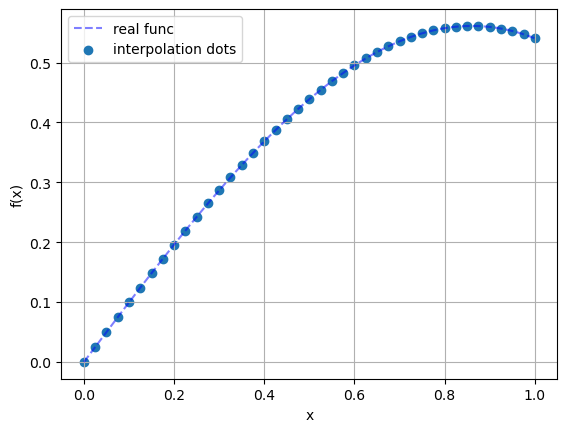

In [28]:
x = np.linspace(0, 1, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.scatter(nodes_value_table['x'], nodes_value_table['f(x)'], label='interpolation dots', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

## Вывод

Таким образом, мы смогли построить новую таблицу узлов для функции $f(x)$. Для этого нам понадобилось задать наперед погрешность и выбрать степень многочлена интерполирования в соответствии с оценкой остатка интерполирования. После чего, пользуясь формулами для интерполирования в начале таблицы и в конце таблицы, мы смогли найти необходимые значения.

# Задача 2

По условию задачи нам даны две функции, для которых мы должны построить интерполяционные многочлены, $$f_1(x) = \cos x,\quad f_2(x) = |x| - 1.$$
Сразу определим для них соответствующие компьютерные функции.

In [29]:
def f_1(x):
    return np.cos(x)

def f_2(x):
    return abs(x) - 1

## Интерполирование многочленами по узлам равномерно расположенным на отрезке

Проведем разбиение всего отрезка $[-3; 3]$ на $n$ равномерных частей, где $n =3,5,7,10,15,20$.

In [30]:
a, b = -3, 3

interpolation_3_nodes = np.linspace(a, b, 3)
interpolation_5_nodes = np.linspace(a, b, 5)
interpolation_7_nodes = np.linspace(a, b, 7)
interpolation_10_nodes = np.linspace(a, b, 10)
interpolation_15_nodes = np.linspace(a, b, 15)
interpolation_20_nodes = np.linspace(a, b, 20)

interpolation_nodes_table = pd.DataFrame.from_dict({'3 nodes' : interpolation_3_nodes, 
                                          '5 nodes' : interpolation_5_nodes, 
                                          '7 nodes' : interpolation_7_nodes,
                                          '10 nodes' : interpolation_10_nodes, 
                                          '15 nodes' : interpolation_15_nodes, 
                                          '20 nodes' : interpolation_20_nodes}, orient='index').T.fillna(' ')

In [31]:
interpolation_nodes_table

,3 nodes,5 nodes,7 nodes,10 nodes,15 nodes,20 nodes
0,-3.00000,-3.00000,-3.00000,-3.00000,-3.00000,-3.00000
1,0.00000,-1.50000,-2.00000,-2.33333,-2.57143,-2.68421
2,3.00000,0.00000,-1.00000,-1.66667,-2.14286,-2.36842
3,,1.50000,0.00000,-1.00000,-1.71429,-2.05263
4,,3.00000,1.00000,-0.33333,-1.28571,-1.73684
5,,,2.00000,0.33333,-0.85714,-1.42105
6,,,3.00000,1.00000,-0.42857,-1.10526
7,,,,1.66667,0.00000,-0.78947
8,,,,2.33333,0.42857,-0.47368
9,,,,3.00000,0.85714,-0.15789


### Построение интерполяционного многочлена Лагранжа

Запишем общие формулы для построения интерполяционного многочлена Лагранжа.

Обозначим $$c_i = \dfrac{1}{(x_i - x_0)\ldots (x_i - x_{i-1})(x_i - x_{i+1})\ldots (x_i-x_n)}.$$


In [32]:
def c(x_i, nodes):
    product = 1
    for node in nodes:
        if node == x_i:
            continue
        product *= (x_i - node)
    return 1 / product

Введем в рассмотрение полином $(n+1)$-ой степени $$\omega_{n+1}(x) = (x-x_0)\ldots (x-x_n).$$

In [33]:
def w(x, nodes):
    product = 1
    for node in nodes:
        product *= (x - node)
    return product

Тогда $$c_i = \dfrac{1}{w'_{n+1}(x_i)}.$$
Отсюда мы можем записать формулу $$P_n(x) = \sum_{i=0}^{n}l_i(x)f(x_i) = \sum_{i=0}^{n}\dfrac{w_{n+1}(x)}{(x-x_i)w'_{n+1}(x_i)}f(x_i).$$
Эта формула называется **формулой Лагранжа для интерполяционного многочлена $P_n$**.

Зададим компьютерную функцию, которая будут вычислять значение этого многочлена при заданном $x$.

In [34]:
def lagrange_interpolation(x, nodes, function):
    summary = 0
    for node in nodes:
        summary += w(x, nodes) * function(node) * c(node, nodes) / (x - node)
    return summary

Теперь реализуем цикл, который будет для каждого $n$ узлов строить график обеих рассматриваемых функций $f_1(x)$, $f_2(x)$ на указанном отрезке $[a,b]$

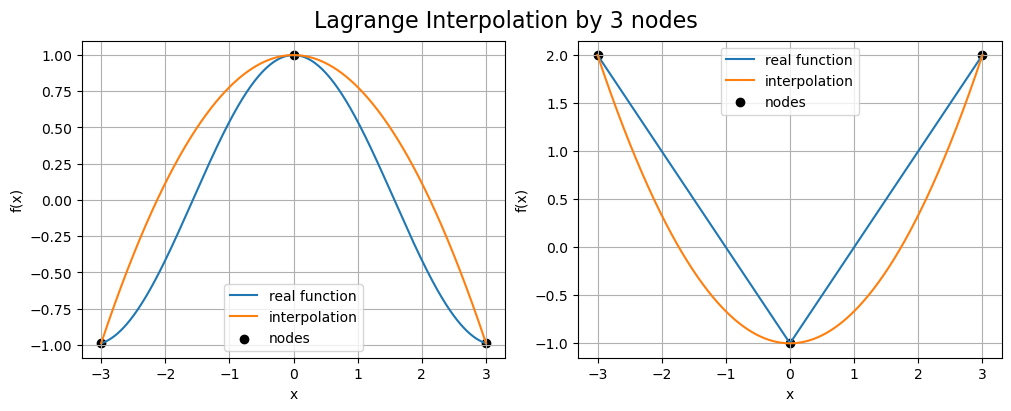

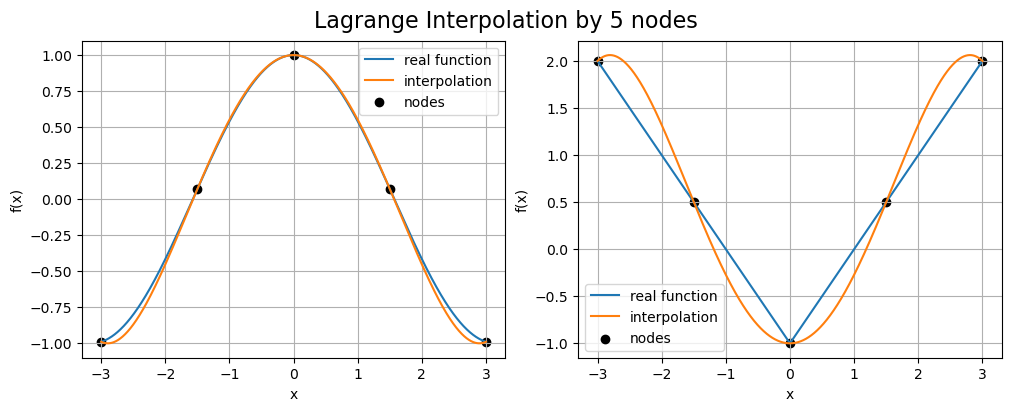

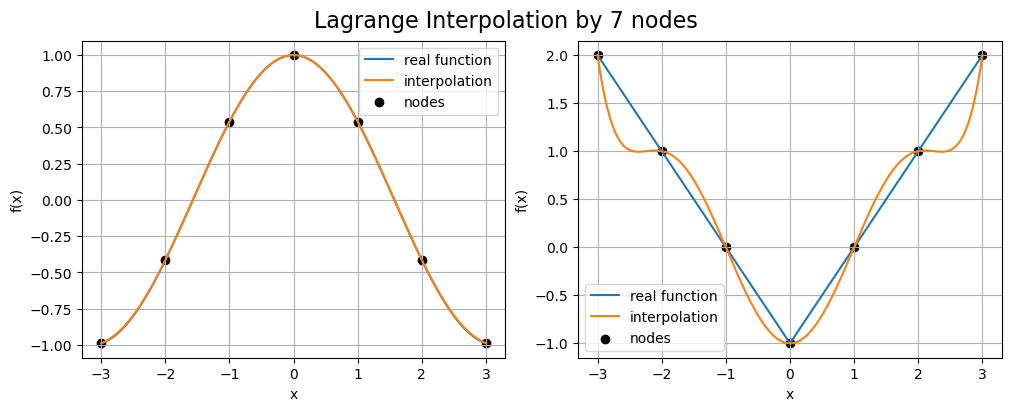

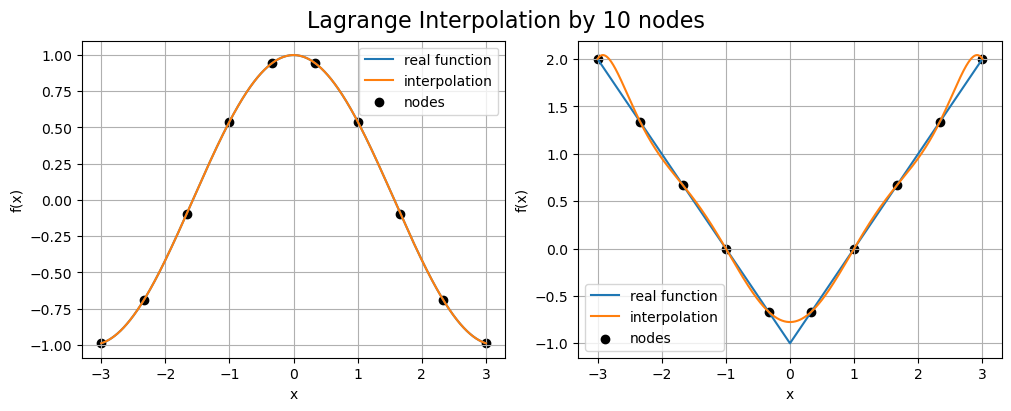

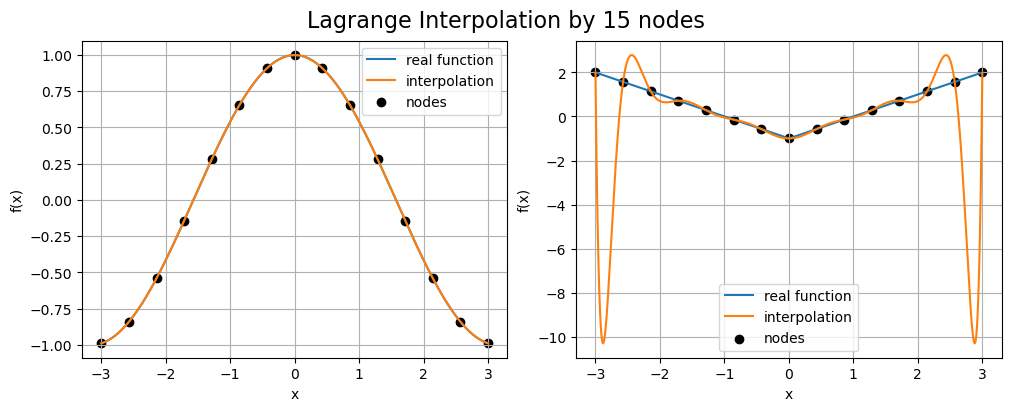

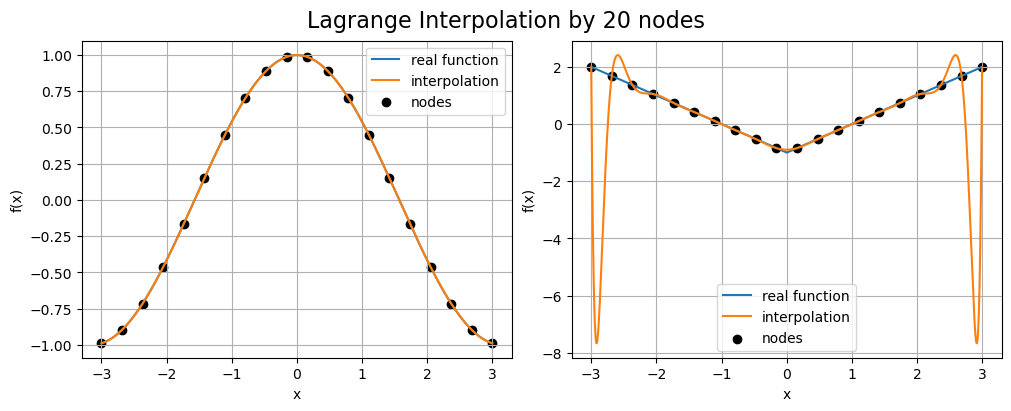

In [35]:
x = np.linspace(a, b, 100000) # берем 100000 точек интерполирования на отрезке [a,b]
for nodes_num in [3, 5, 7, 10, 15, 20]: # проходим циклом по всевозможным количествам узлов
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), layout='constrained', sharey=False)
    
    interpolation_nodes = np.linspace(a, b, nodes_num) # задаем множество узлов
    plot_dots = np.setdiff1d(x, interpolation_nodes) # из множества точек интерполирования исключаем те, которые являются узлами для избежания деления на 0.
    
    # построение графика функции f_1
    ax1.plot(x, f_1(x), label='real function')
    ax1.plot(plot_dots, lagrange_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_1), label='interpolation')
    ax1.scatter(interpolation_nodes, f_1(interpolation_nodes), label='nodes', color='black')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.legend()
    ax1.grid()

    # построение графика функции f_2
    ax2.plot(x, f_2(x), label='real function')
    ax2.plot(plot_dots, lagrange_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_2), label='interpolation')
    ax2.scatter(interpolation_nodes, f_2(interpolation_nodes), label='nodes', color='black')
    ax2.set_xlabel('x')
    ax2.set_ylabel('f(x)')
    ax2.legend()
    ax2.grid()

    fig.suptitle(f'Lagrange Interpolation by {nodes_num} nodes', fontsize=16)

### Построение интерполяционного многочлена Ньютона

$\bullet$ **Разделенная разность нулевого порядка для функции $f(x)$** совпадает со значениями функции $f(x_i)$ в узлах интерполирования. 

**Разделенная разность первого порядка** есть $$f(x_i, x_j) = \dfrac{f(x_j) - f(x_i)}{x_j - x_i}.$$
**Разделенная разность $(k+1)$-ого порядка** $$f(x_0, \ldots, x_{k+1}) = \dfrac{f(x_1,\ldots, x_{k+1}) - f(x_0,\ldots, x_k)}{x_{k+1} - x_0}.$$
Можно показать, что справедлива формула, связывающая разделенную разность $k$-ого порядка со значениями функции в указанных узлах
$$f(x_0, x_1,\ldots, x_k) = \sum_{j=0}^{k} \dfrac{f(x_j)}{\omega_{k+1}'(x_j)},$$
где $\omega_{k+1}$ определяется из формулы. 

Определим компьютерную функцию, реализующую вычисление разделенных разностей через указанную формулу

In [36]:
def div_diff_sum(nodes, function):
    summary = 0
    for node in nodes:
        summary += function(node) * c(node, nodes)
    return summary

Также разделенные разности можно вычислять табличным способом. Для этого строица таблица наподобие $$\begin{matrix} x_0 & f(x_0) & f(x_0, x_1) & f(x_0,x_1,x_2) & \ldots & f(x_0,\ldots, x_{n-1}) & f(x_0,\ldots, x_n) \\ x_1 & f(x_1) & f(x_1, x_2) & f(x_1,x_2,x_3) & \ldots & f(x_1,\ldots, x_{n-1}) & - \\ \vdots & \vdots & \vdots & \vdots & \ddots & - & -\\ x_{n-1} & f(x_{n-1}) & f(x_{n-2}, x_{n-1}) & - & \ldots & - & - \\ x_n & f(x_n) & - & - & \ldots & - & -\end{matrix}$$

In [37]:
def div_diff_table(nodes, function, as_table=False):
    if isinstance(nodes, list):
        nodes = np.array(nodes)
    n = nodes.shape[0]
    table = np.zeros((n, n+1))
    for i in range(n):
        table[i, 0] = nodes[i]
        table[i, 1] = function(nodes[i])
    for i in range(2, n+1):
        for j in range(n-i+1):
            table[j,i] = (table[j+1,i-1] - table[j, i-1]) / (nodes[j+i-1] - nodes[j])
    if as_table:
        return table
    else:
        return table[0, n]

Для примера сравним построенную таблицу разделенных разностей и значение, которое мы можем получить через указанную ранее формулу.

In [38]:
pd.DataFrame(div_diff_table(interpolation_5_nodes, f_1, True))

,0,1,2,3,4,5
0,-3.00000,-0.98999,0.70715,-0.02921,-0.08529,0.02843
1,-1.50000,0.07074,0.61951,-0.41301,0.08529,0.00000
2,0.00000,1.00000,-0.61951,-0.02921,0.00000,0.00000
3,1.50000,0.07074,-0.70715,0.00000,0.00000,0.00000
4,3.00000,-0.98999,0.00000,0.00000,0.00000,0.00000


In [39]:
div_diff_sum(interpolation_5_nodes, f_1)

0.028428949740390824

Значение, полученное через формулу с суммой совпадает с крайним правым значением в таблице разделенных разностей (возможность построения разделенной разности единственная).

Используя аппарат разделенных разностей получим формулу интерполяционного многочлена. Подставляя это в формулу для тождественного представления $P_n(x)$, мы в итоге получим
$$P_n(x) = f(x_0) + (x-x_0)\cdot f(x_0, x_1) + (x-x_0)(x-x_1)\cdot f(x_0,x_1,x_2) +\ldots \\ \ldots + (x-x_0)\ldots (x-x_{n-1})\cdot f(x_0,\ldots, x_n).$$
Эта формула называется **формулой Ньютона для интерполяционного многочлена** $P_n(x)$.

Реализуем компьютерную функцию, которая будет вычислять значение интерполяционного многочлена в заданной точке $x_i$.

In [40]:
def newtow_interpolation(x, nodes, function):
    P_n = 0
    nodes_list = []
    for node in nodes:
        nodes_list.append(node)
        P_n += div_diff_table(nodes_list, function)*w(x, nodes_list[0:-1])
    return P_n

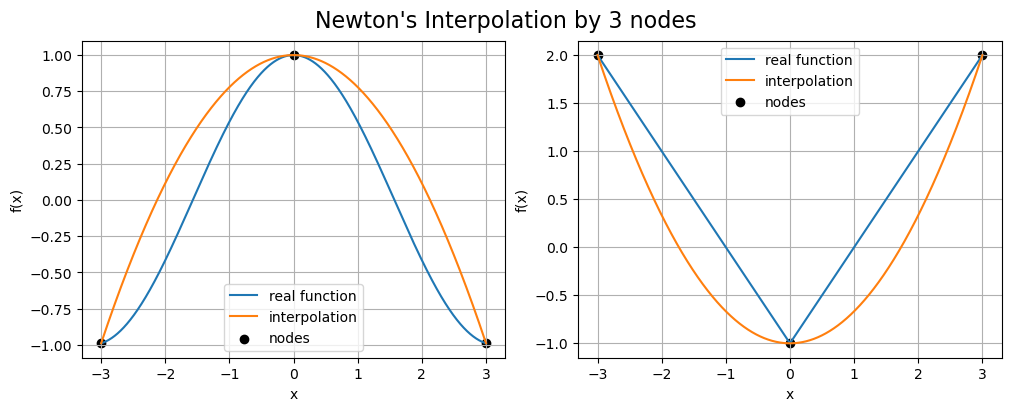

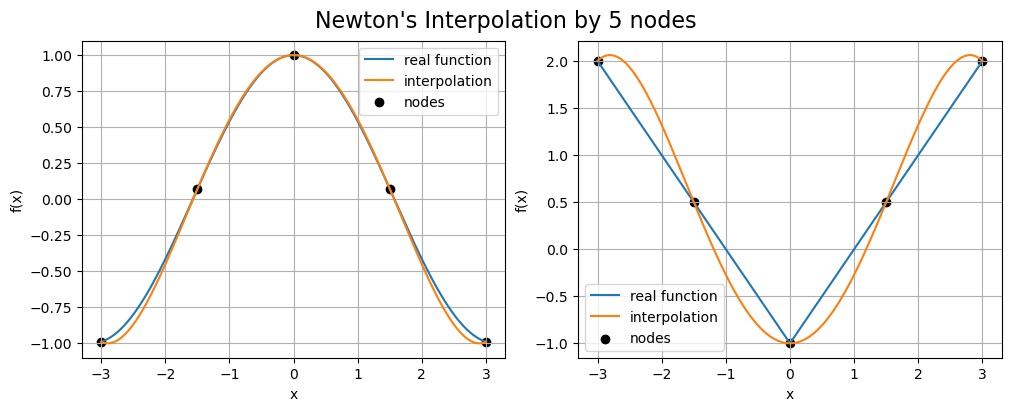

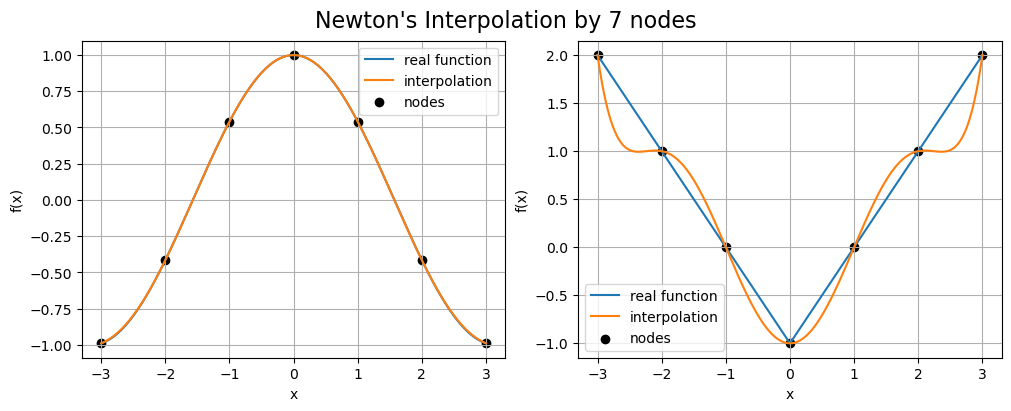

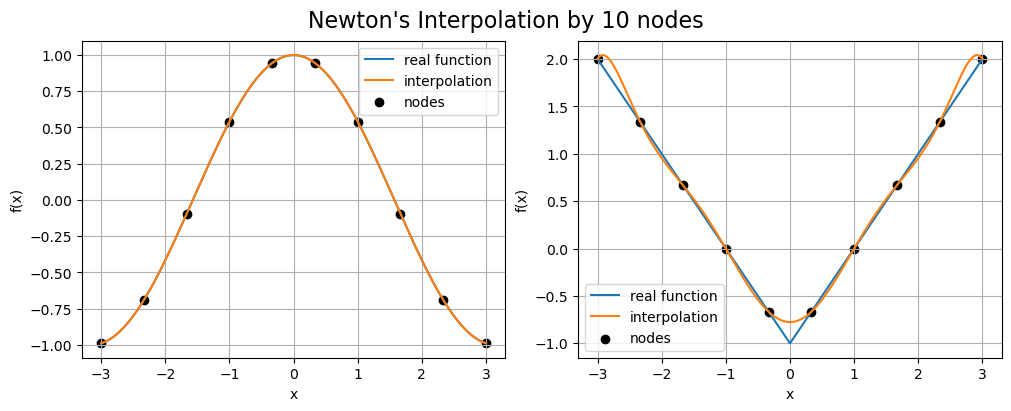

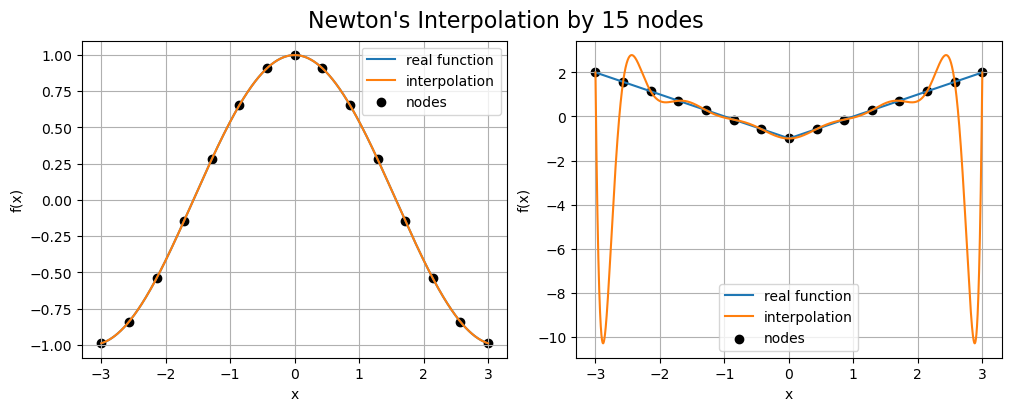

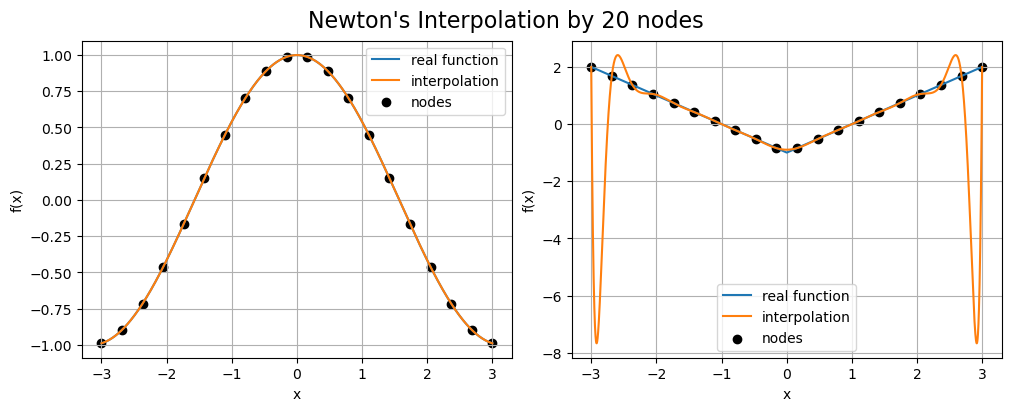

In [41]:
x = np.linspace(a, b, 100000)
for nodes_num in [3, 5, 7, 10, 15, 20]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), layout='constrained', sharey=False)
    
    interpolation_nodes = np.linspace(a, b, nodes_num)
    plot_dots = x

    ax1.plot(x, f_1(x), label='real function')
    ax1.plot(plot_dots, newtow_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_1), label='interpolation')
    ax1.scatter(interpolation_nodes, f_1(interpolation_nodes), label='nodes', color='black')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.legend()
    ax1.grid()

    ax2.plot(x, f_2(x), label='real function')
    ax2.plot(plot_dots, newtow_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_2), label='interpolation')
    ax2.scatter(interpolation_nodes, f_2(interpolation_nodes), label='nodes', color='black')
    ax2.set_xlabel('x')
    ax2.set_ylabel('f(x)')
    ax2.legend()
    ax2.grid()

    fig.suptitle(f"Newton's Interpolation by {nodes_num} nodes", fontsize=16)

В соответствии с корректностью поставленной задачи, а именно единственностью решения, мы можем увидеть, что оба интерполяционных многочлена дали одинаковый результат. 

Также заметим, что в случае функции $f_1(x) = \cos x$ многочлен 7-ой степени уже достаточно хорошо смог интерполировать эту функцию. В случае функции $f_2(x) = |x| - 1$ достаточно близкий к истине результат был получен при интерполяции многочленом 10-ой степени. Однако при повышении степени заметны значительные отклонения интерполяционной функции.

#### Интерполирование многочленами по узлам расположенным на указанном отрезке оптимальным образом

Для минимизации остатка интерполирования выберем узлы по формуле
$$x_k = \dfrac{a+b}{2} + \dfrac{b-a}{2}\cos \dfrac{(2k+1)\pi}{2(n+1)},\ k=\overline{0,n}.$$
Если выбрать узлами интерполирования $x_0,\ldots, x_n$ таким образом, то величина отклонения $\omega_{n+1}(x)$ от нуля окажется минимальной. 

Для упорядочивания узлов необходима перенумерация $\widetilde{x}_k = x_{n-k},\ k=\overline{0,n}.$

Составим таблицу нового разбиения на узлы (сразу зададим обратную нумерацию для упорядочивания узлов):

In [42]:
interpolation_3_nodes_opt = [(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(4))) for k in range(3)][::-1]
interpolation_5_nodes_opt = [(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(6))) for k in range(5)][::-1]
interpolation_7_nodes_opt = [(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(8))) for k in range(7)][::-1]
interpolation_10_nodes_opt = [(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(11))) for k in range(10)][::-1]
interpolation_15_nodes_opt = [(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(15))) for k in range(15)][::-1]
interpolation_20_nodes_opt = [(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(20))) for k in range(20)][::-1]

interpolation_nodes_table_opt = pd.DataFrame.from_dict({'3 nodes' : interpolation_3_nodes_opt, 
                                          '5 nodes' : interpolation_5_nodes_opt, 
                                          '7 nodes' : interpolation_7_nodes_opt,
                                          '10 nodes' : interpolation_10_nodes_opt, 
                                          '15 nodes' : interpolation_15_nodes_opt, 
                                          '20 nodes' : interpolation_20_nodes_opt}, orient='index').T.fillna(' ')

In [43]:
interpolation_nodes_table_opt

,3 nodes,5 nodes,7 nodes,10 nodes,15 nodes,20 nodes
0,-1.14805,-2.12132,-2.49441,-2.72890,-2.98357,-2.99075
1,1.14805,-0.77646,-1.66671,-2.26725,-2.85317,-2.91711
2,2.77164,0.77646,-0.58527,-1.62192,-2.59808,-2.77164
3,,2.12132,0.58527,-0.84520,-2.22943,-2.55792
4,,2.89778,1.66671,0.00000,-1.76336,-2.28122
5,,,2.49441,0.84520,-1.22021,-1.94834
6,,,2.94236,1.62192,-0.62374,-1.56750
7,,,,2.26725,0.00000,-1.14805
8,,,,2.72890,0.62374,-0.70034
9,,,,2.96946,1.22021,-0.23538


Сначала приведем интерполяцию многочленом Лагранжа:

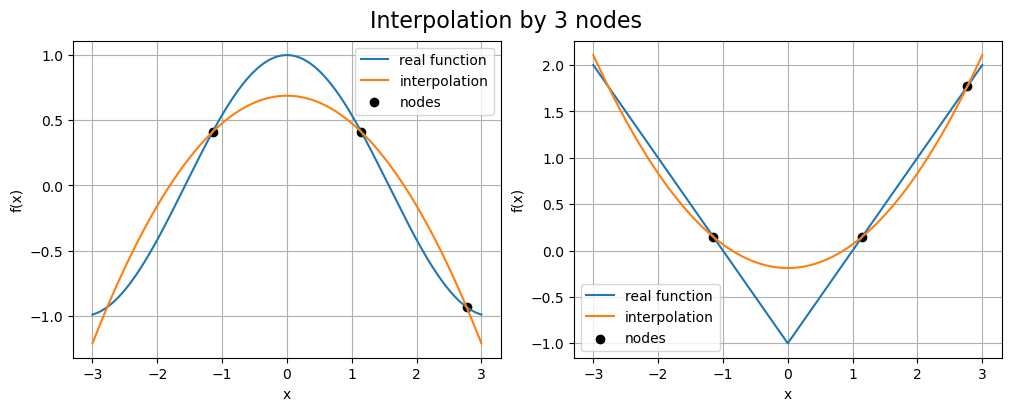

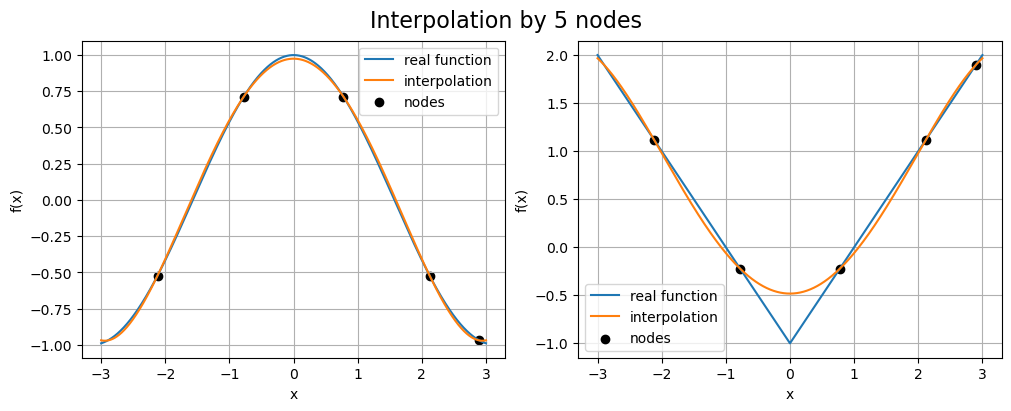

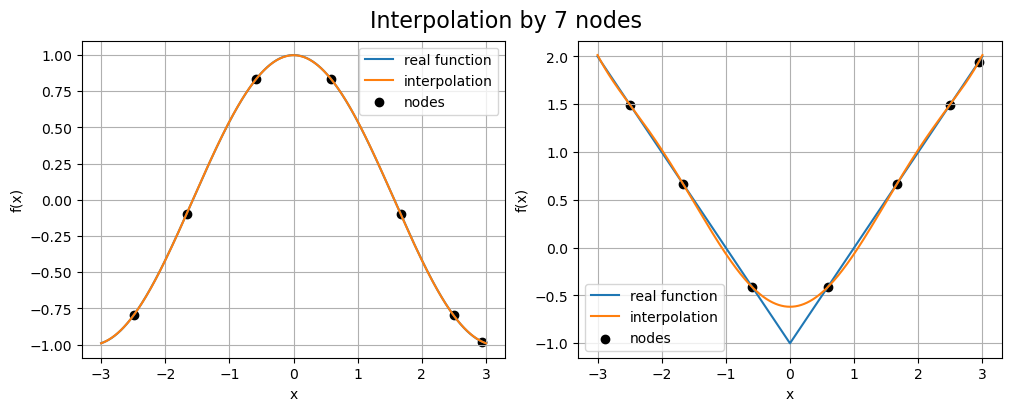

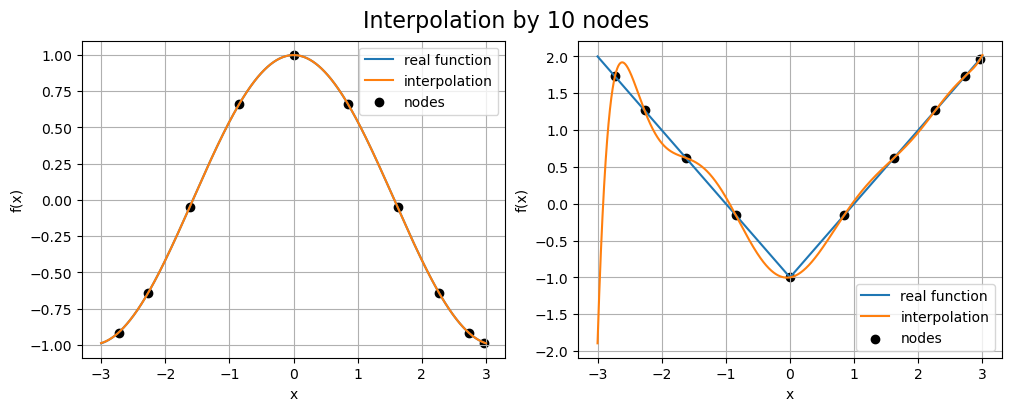

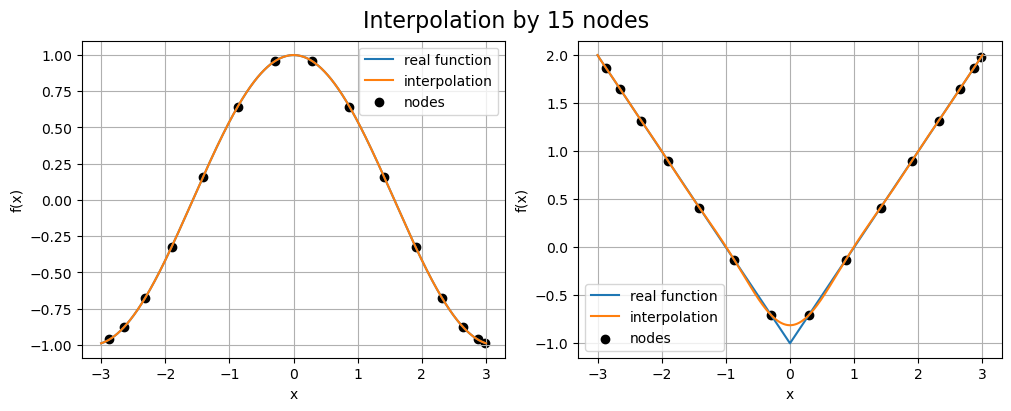

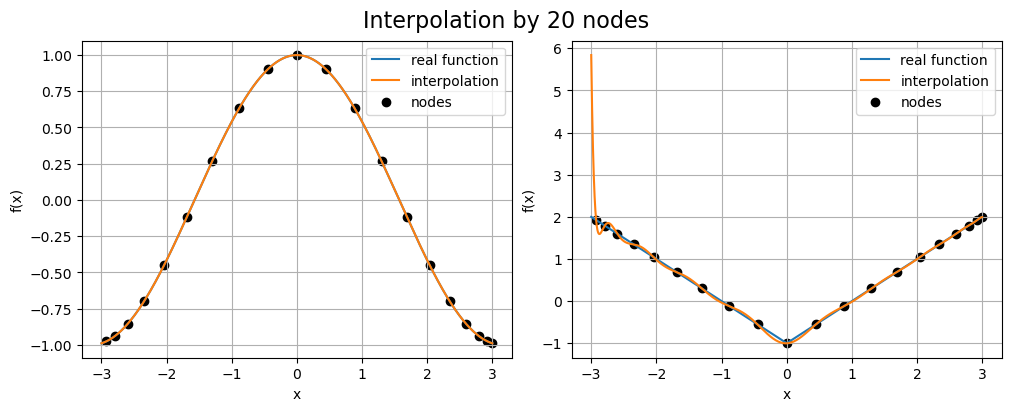

In [44]:
x = np.linspace(a, b, 100000)
for nodes_num in [3, 5, 7, 10, 15, 20]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), layout='constrained', sharey=False)
    
    interpolation_nodes = np.array([(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(nodes_num+1))) for k in range(nodes_num)][::-1])
    plot_dots = np.setdiff1d(x, interpolation_nodes)

    ax1.plot(x, f_1(x), label='real function')
    ax1.plot(plot_dots, lagrange_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_1), label='interpolation')
    ax1.scatter(interpolation_nodes, f_1(interpolation_nodes), label='nodes', color='black')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.legend()
    ax1.grid()

    ax2.plot(x, f_2(x), label='real function')
    ax2.plot(plot_dots, lagrange_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_2), label='interpolation')
    ax2.scatter(interpolation_nodes, f_2(interpolation_nodes), label='nodes', color='black')
    ax2.set_xlabel('x')
    ax2.set_ylabel('f(x)')
    ax2.legend()
    ax2.grid()

    fig.suptitle(f'Interpolation by {nodes_num} nodes', fontsize=16)

Теперь приведем интерполирование многочленом Ньютона

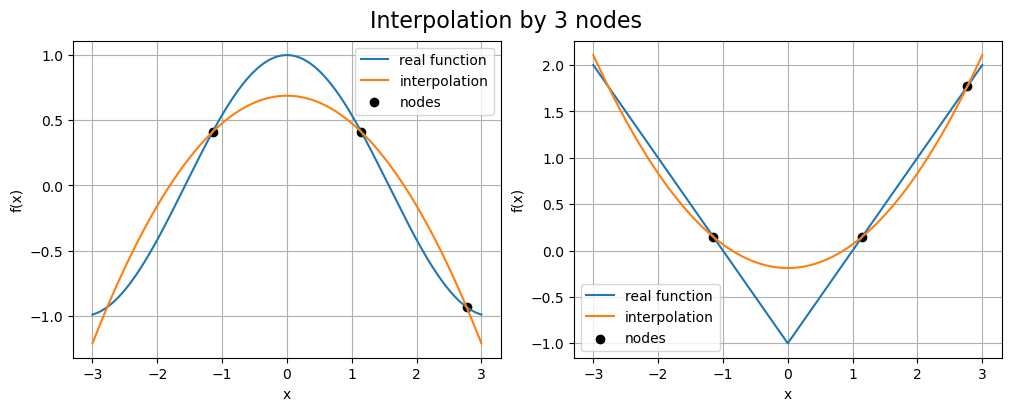

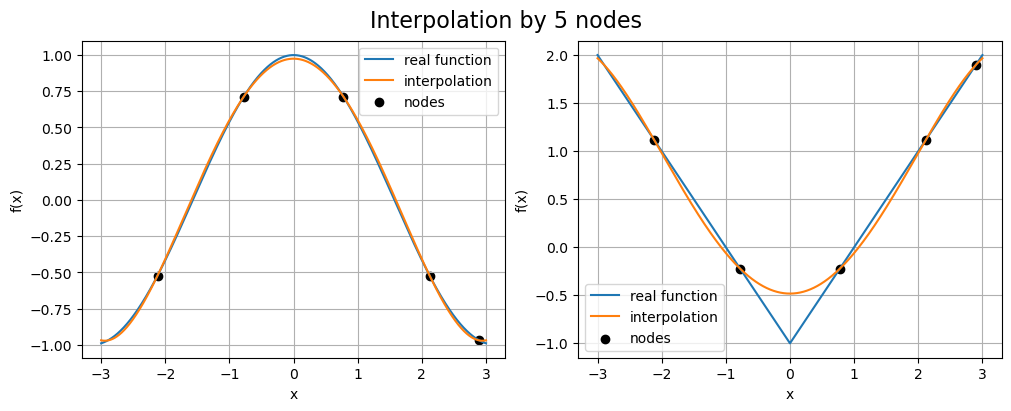

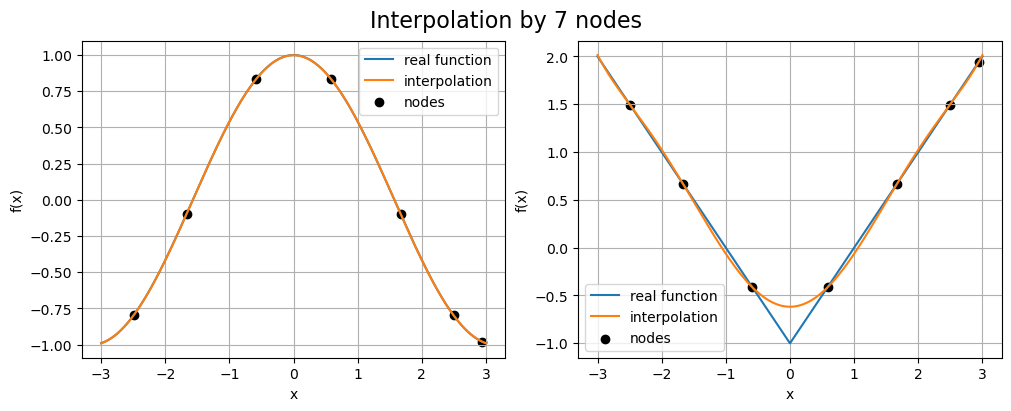

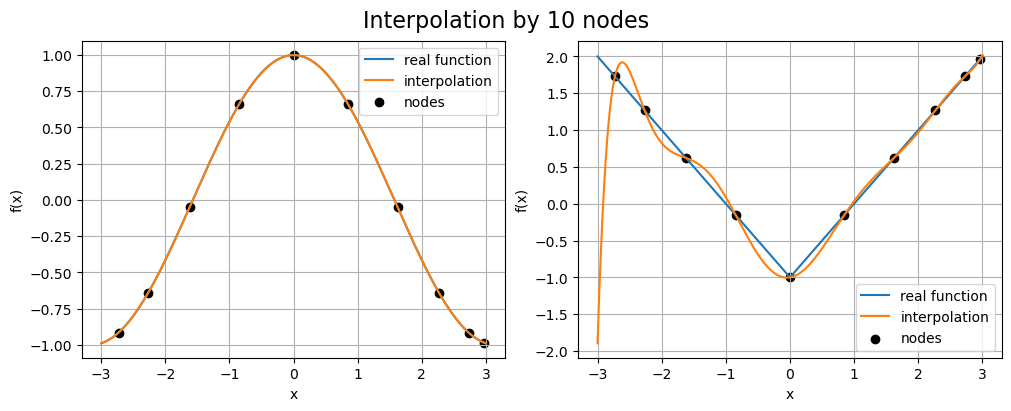

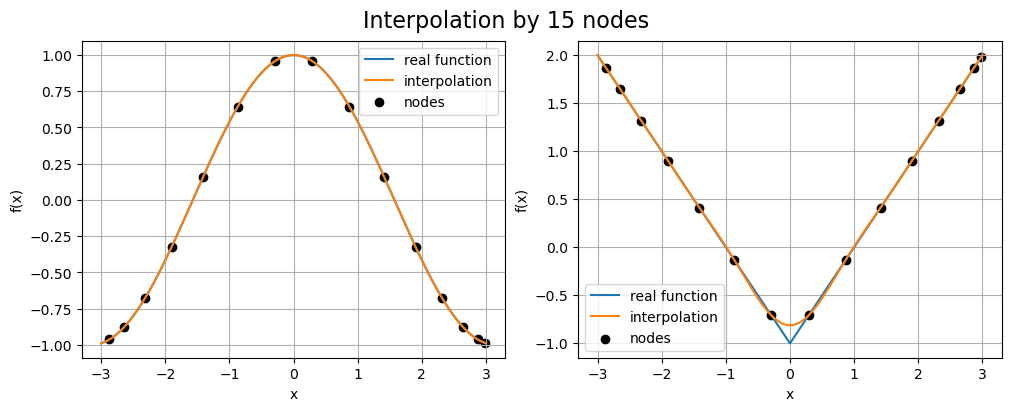

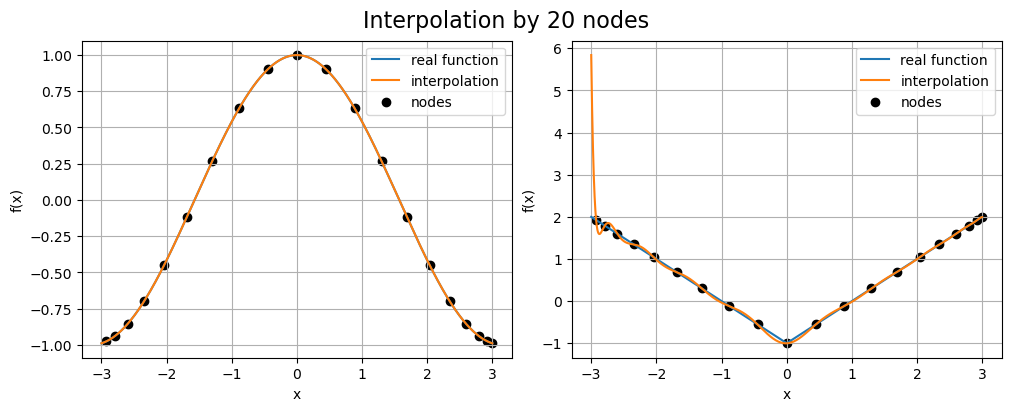

In [45]:
x = np.linspace(a, b, 100000)
for nodes_num in [3, 5, 7, 10, 15, 20]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), layout='constrained', sharey=False)
    
    interpolation_nodes = np.array([(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(nodes_num+1))) for k in range(nodes_num)][::-1])
    plot_dots = x

    ax1.plot(x, f_1(x), label='real function')
    ax1.plot(plot_dots, newtow_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_1), label='interpolation')
    ax1.scatter(interpolation_nodes, f_1(interpolation_nodes), label='nodes', color='black')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.legend()
    ax1.grid()

    ax2.plot(x, f_2(x), label='real function')
    ax2.plot(plot_dots, newtow_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_2), label='interpolation')
    ax2.scatter(interpolation_nodes, f_2(interpolation_nodes), label='nodes', color='black')
    ax2.set_xlabel('x')
    ax2.set_ylabel('f(x)')
    ax2.legend()
    ax2.grid()

    fig.suptitle(f'Interpolation by {nodes_num} nodes', fontsize=16)

Заметим, что в данном случае узлы были распределены немного иным образом, отличным от предыдущего случая. Достаточно хорошо удалось интерполировать функцию $f_1(x) = \cos x$ многочленом 5-ой степени, а практически идеально все так же многочленом 7-ой степени. В случае функции $f_2(x) = |x| - 1$ достаточно хорошим результат оказался в случае полинома 15-ой степени. Но в полиномах 10-ой и 20-ой степеней заметны резкие отклонения интерполяционной функции от реальной.

## Вывод
Таким образом, мы построили интерполяционные многочлены в форме Ньютона и Лагранжа, а также исследовали отличия при взятии равностоящих узлов и узлов, расположенных оптимальным образом. Заметно, что при взятии узлов оптимальным образом интерполирование функции $f_2(x) = |x| - 1$ гораздо лучше описывает реальную функцию. Однако в обоих случаях присутствуют участки резкого отклонения интерполяционной функции от реальной. Это связано со спецификой самой функции $|x|$ (для нее интерполяционный процесс при равноотстоящих узлах вообще говоря сходится не во всех точках на $[-1, 1]$).